In [1]:
from qcodes_contrib_drivers.drivers.Sirah.Matisse import *
from qcodes.loops import Loop
import visa
from qcodes.dataset.plotting import plot_dataset
import time

In [2]:
rm = visa.ResourceManager()

rm.list_resources()

('USB0::0x17E7::0x0101::15-25-15::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

In [ ]:
vinstr = rm.open_resource("USB0::0x17E7::0x0101::15-25-15::INSTR")

In [ ]:
vinstr.query("MOTBI:CL")

In [ ]:
vinstr.query("MOTTE:CL")

In [ ]:
vinstr.query("ERR:CL")

In [ ]:
vinstr.query("IDN?")

In [ ]:
vinstr.read_raw()

In [ ]:
vinstr.close()

In [3]:
instr = SirahMatisse("matisse", "USB0::0x17E7::0x0101::15-25-15::INSTR")

RAW-RESPONSE: OK
RAW-RESPONSE: OK
RAW-RESPONSE: OK
RAW-RESPONSE: :IDN: "Matisse TR, S/N:15-25-15, DSP Rev.:01.01, Firmware:1.13, Date:Jan 27 2015" 
SPLITTED-RESPONSE: "Matisse TR, S/N:15-25-15, DSP Rev.:01.01, Firmware:1.13, Date:Jan 27 2015" 
Connected to: "Matisse TR S/N:15-25-15 (serial:DSP Rev.:01.01, firmware:Firmware:1.13, Date:Jan 27 2015") in 0.03s


In [4]:
instr.IDN()

RAW-RESPONSE: :IDN: "Matisse TR, S/N:15-25-15, DSP Rev.:01.01, Firmware:1.13, Date:Jan 27 2015" 
SPLITTED-RESPONSE: "Matisse TR, S/N:15-25-15, DSP Rev.:01.01, Firmware:1.13, Date:Jan 27 2015" 


{'vendor': '"Matisse TR',
 'model': 'S/N:15-25-15',
 'serial': 'DSP Rev.:01.01',
 'firmware': 'Firmware:1.13, Date:Jan 27 2015"'}

In [ ]:
instr.ask("ERR:CL")

In [5]:
instr.motor_bifi.position()

RAW-RESPONSE: :MOTBI:POS: 98950 
SPLITTED-RESPONSE: 98950 


98950

In [6]:
instr.motor_bifi.position(98000)

RAW-RESPONSE: OK
Set target position to 98000
Waiting for reaching target ...
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 776 
SPLITTED-RESPONSE: 776 
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA:

In [7]:
instr.motor_bifi.target_position()

98000

In [8]:
# Sweep position from 97000 to 99000 in steps of 50

# Following line doesn't work because sweep-fucntion generates floats instead of ints:
# loop = Loop(instr.bifi.position.sweep(95000, 100000, step=50)).each(...)

# Instead use a range
rng = range(97000, 99000, 50)
loop = Loop(instr.motor_bifi.position[rng]).each(instr.motor_bifi.position, instr.power_diode.dc_value, instr.thin_etalon.dc_value)

In [9]:
# Run sweep

# There will be a problem running the sweep, because setting the position
# doesn't wait until the position is reached. Need to do something to prevent
# this... (maybe there is a wait-command or poll the position by hand, e.g. poll status != idle)

data = loop.run()

Started at 2020-10-19 11:53:26
RAW-RESPONSE: OK
Set target position to 97000
Waiting for reaching target ...
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Stat

RAW-RESPONSE: :MOTBI:STA: 8706
SPLITTED-RESPONSE: 8706
    Status: 2
RAW-RESPONSE: :MOTBI:POS: 97850 
SPLITTED-RESPONSE: 97850 
RAW-RESPONSE: :DPOW:DC: 1.289063e-01
SPLITTED-RESPONSE: 1.289063e-01
RAW-RESPONSE: :TE:DC: 5.761719e-02
SPLITTED-RESPONSE: 5.761719e-02
RAW-RESPONSE: OK
Set target position to 97900
Waiting for reaching target ...
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8706
SPLITTED-RESPONSE: 8706
    Status: 2
RAW-RESPONSE: :MOTBI:POS: 97900 
SPLITTED-RESPONSE: 97900 
RAW-RESPONSE: :DPOW:DC: 1.191406e-01
SPLITTED-RESPONSE: 1.191406e-01
RAW-RESPONSE: :TE:DC: 5.175781e-02
SPLITTED-RESPONSE: 5.175781e-02
RAW-RESPONSE: OK
Set target position to 97950
Waiting for reaching target ...
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8968
SPLITTED-RESPONSE: 8968
    Status: 8
RAW-RESPONSE: :MOTBI:STA: 8706
SPLITTED-

DataSet:
   location = 'data/2020-10-19/#005_{name}_11-53-26'
   <Type>   | <array_id>                      | <array.name> | <array.shape>
   Setpoint | matisse_motor_bifi_position_set | position     | (40,)
   Measured | matisse_motor_bifi_position     | position     | (40,)
   Measured | matisse_power_diode_dc_value    | dc_value     | (40,)
   Measured | matisse_thin_etalon_dc_value    | dc_value     | (40,)
Finished at 2020-10-19 11:53:27


In [10]:
data

DataSet:
   location = 'data/2020-10-19/#005_{name}_11-53-26'
   <Type>   | <array_id>                      | <array.name> | <array.shape>
   Setpoint | matisse_motor_bifi_position_set | position     | (40,)
   Measured | matisse_motor_bifi_position     | position     | (40,)
   Measured | matisse_power_diode_dc_value    | dc_value     | (40,)
   Measured | matisse_thin_etalon_dc_value    | dc_value     | (40,)

In [11]:
# Here you will see that sweeping is faster than setting the position
print("POSITION SET", "\t", "MEASURED POS", "\t", "POWER DIODE", "\t", "THIN ETALON REFLEX")
for i, setpoint in enumerate(data.matisse_motor_bifi_position_set):
    print(setpoint, "\t", data.matisse_motor_bifi_position[i], "\t", data.matisse_power_diode_dc_value[i], "\t", data.matisse_thin_etalon_dc_value[i])

POSITION SET 	 MEASURED POS 	 POWER DIODE 	 THIN ETALON REFLEX
97000.0 	 97000.0 	 0.1474609 	 0.3154297
97050.0 	 97050.0 	 0.1455078 	 0.06933594
97100.0 	 97100.0 	 0.1318359 	 0.05566406
97150.0 	 97150.0 	 0.1464844 	 0.3291016
97200.0 	 97200.0 	 0.1455078 	 0.2285156
97250.0 	 97250.0 	 0.1357422 	 0.1796875
97300.0 	 97300.0 	 0.1308594 	 0.09375
97350.0 	 97350.0 	 0.1308594 	 0.08691406
97400.0 	 97400.0 	 0.125 	 0.08300781
97450.0 	 97450.0 	 0.1347656 	 0.09082031
97500.0 	 97500.0 	 0.1337891 	 0.08789063
97550.0 	 97550.0 	 0.1259766 	 0.08496094
97600.0 	 97600.0 	 0.1162109 	 0.1542969
97650.0 	 97650.0 	 0.1259766 	 0.1738281
97700.0 	 97700.0 	 0.1240234 	 0.1669922
97750.0 	 97750.0 	 0.1132813 	 0.07128906
97800.0 	 97800.0 	 0.1279297 	 0.05566406
97850.0 	 97850.0 	 0.1289063 	 0.05761719
97900.0 	 97900.0 	 0.1191406 	 0.05175781
97950.0 	 97950.0 	 0.1201172 	 0.2636719
98000.0 	 98000.0 	 0.1201172 	 0.2939453
98050.0 	 98050.0 	 0.1113281 	 0.2158203
98100.0 

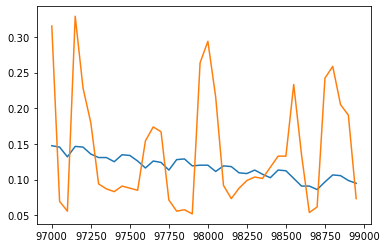

In [12]:
import matplotlib.pyplot as plt

x = data.matisse_motor_bifi_position_set
y_list = [data.matisse_power_diode_dc_value, data.matisse_thin_etalon_dc_value]

for y in y_list:
    plt.plot(x, y)

In [13]:
instr.close()